In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
%config Completer.use_jedi = False

In [59]:
def get_fitness_df(df):
    fitness_col = [col for col in df if col.startswith('fitness')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_time_df(df):
    fitness_col = [col for col in df if col.startswith('time')]
    df_fitness = df[fitness_col]
    return df_fitness

def get_fevals_df(df):
    fitness_col = [col for col in df if col.startswith('fevals')]
    df_fitness = df[fitness_col]
    return df_fitness

def plot_fitness(df_fitness, names={}, title="", save_as=None):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Fitness") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fitness_" + name], label=label)
        
    plt.legend()
    plt.grid()
    
    if save_as:
        plt.savefig('images/'+save_as)
    
    plt.show()

def plot_time(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Time") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["time_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def plot_fevals(df_fitness, names={}, title=""):        
    # Plot
    plt.title(title)
    plt.xlabel("Iterations")
    plt.ylabel("Function Evals") 
    
    for name, label in names.items():
        plt.plot(df_fitness.index, df_fitness["fevals_" + name], label=label)
        
    plt.legend()
    plt.grid()
    plt.show()
    
def combine_csv(problem, names={}):
    # read first file so we can get indexes
    _first_file_name = list(names.keys())[0]
    df_read = pd.read_csv("ABAGAIL/jython/data/" + problem + "/"+ _first_file_name +".csv")
    df = pd.DataFrame(index = df_read["iters"])
    
    for name in names.keys():
        df_read = pd.read_csv("ABAGAIL/jython/data/"+ problem + "/" + name +".csv", index_col = "iters")
        df_read = df_read.add_suffix("_" + name)

        df = df.join(df_read)
        
    df.ffill(inplace= True)
    return df

In [60]:
def plot_max_fitness_bar(combined_df, names, title="", save_as=None, plot=True):
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_fitness_value = row["fitness_" + name]
        fevals_to_max_fitness = row["fevals_" + name]
        
        x_labels.append(label)
        y_values.append(max_fitness_value)
        
        print(label, "max_fitness=",max_fitness_value, "iterations=",max_fitness_index, "fevals=",fevals_to_max_fitness)
        
    
    if plot:
        plt.title(title)
        plt.ylabel("Fitness Score")
        plt.ylabel("Algorithm") 
        plt.bar(x_labels, y_values)
        plt.show()
    
    if save_as:
        plt.savefig('images/'+save_as)


In [61]:
def plot_max_time_bar(combined_df, names, title="", save_as=None, plot=True):
    x_labels = []
    y_values = []
    
    for name, label in names.items():
        max_fitness_index = combined_df["fitness_" + name].argmax()
        row = combined_df.iloc[max_fitness_index]
        max_time_value = row["time_" + name]
        
        x_labels.append(label)
        y_values.append(max_time_value)
        
        print(label, max_time_value)
        
    if plot:
        plt.title(title)
        plt.ylabel("Time (Seconds)")
        plt.ylabel("Algorithm") 
        bars = plt.bar(x_labels, y_values)
    
        # Set bar color
        for bar in bars:
            bar.set_color('green')
            
        plt.show()
        
    if save_as:
        plt.savefig('images/'+save_as)

# Tune RHC

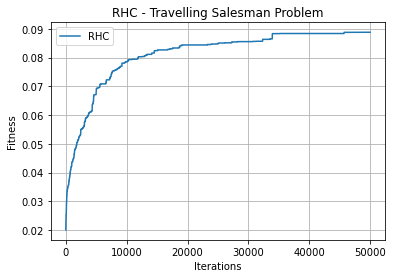

In [62]:
files = {
    "exp00-RHC-0"    : "RHC",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="RHC - Travelling Salesman Problem", save_as='tsm/01')

In [ ]:
plot_max_fitness_bar(df_test[:5000], files, title="", plot=False)

In [ ]:
plot_max_time_bar(df_test[:5000], files, title="", plot=False)

# Tune SA

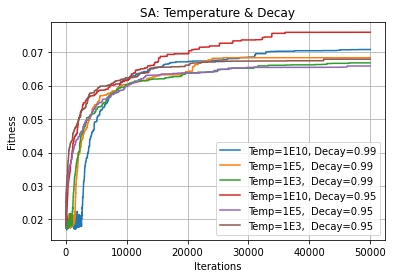

In [68]:
files = {
    "exp01-SA-9"    : "Temp=1E10, Decay=0.99",
    "exp01-SA-10"   : "Temp=1E5,  Decay=0.99",
    "exp01-SA-11"   : "Temp=1E3,  Decay=0.99",
    
    "exp01-SA-0"    : "Temp=1E10, Decay=0.95",
    "exp01-SA-1"    : "Temp=1E5,  Decay=0.95",
    "exp01-SA-2"    : "Temp=1E3,  Decay=0.95",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="SA: Temperature & Decay", save_as="tsm/02")

# Best SA  

In [86]:
# files = {
#     "exp01-SA-12"    : "1E12, .99",
#     "exp01-SA-13"    : "1E12, .95",
#     "exp01-SA-11"    : "1E3, .99",
#     "exp01-SA-10"    : "1E5, .99",
# }

# df_test = combine_csv("tsp", files)

# ft_df = get_fitness_df(df_test)

# fe_df = get_fevals_df(df_test)
# t_df = get_time_df(df_test)

# # ft_df
# plot_fitness(ft_df[:50000], files, title="something")

# Tune MIMIC

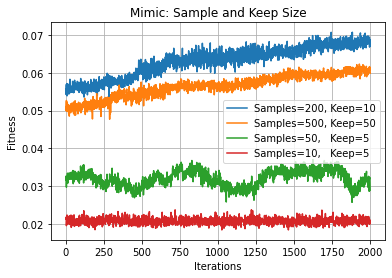

In [85]:
files = {
    "exp02-MIMIC-3"    : "Samples=200, Keep=10",
    "exp02-MIMIC-1"    : "Samples=500, Keep=50",
    "exp02-MIMIC-8"    : "Samples=50,   Keep=5",
    "exp02-MIMIC-12"   : "Samples=10,   Keep=5",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:2000], files, title="Mimic: Sample and Keep Size", save_as="tsm/03")

# Tune GA

## Starting Pop

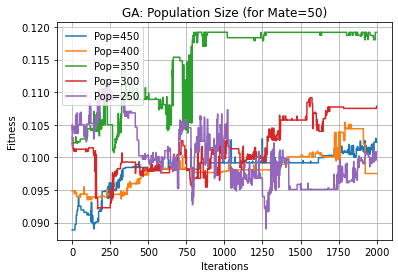

In [124]:
files = {
    "exp04-GA-1"    : "Pop=450",
    "exp04-GA-2"    : "Pop=400",
    "exp04-GA-3"    : "Pop=350",
    "exp04-GA-4"    : "Pop=300",
    "exp04-GA-5"    : "Pop=250",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:2000], files, title="GA: Population Size (for Mate=50)", save_as="tsm/04")

## Pop=350

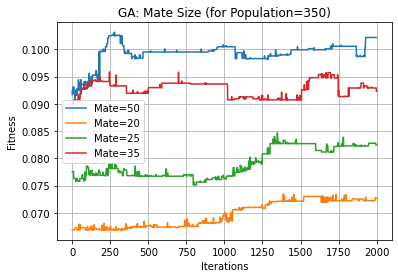

In [138]:
files = {
    "exp05-GA-5"    : "Mate=50",
    "exp05-GA-2"    : "Mate=20",
    "exp05-GA-3"    : "Mate=25",
    "exp05-GA-4"    : "Mate=35",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:2000], files, title="GA: Mate Size (for Population=350)", save_as="tsm/05")

# All Best Algos (N=100)

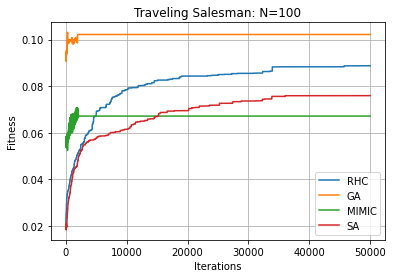

In [180]:
files = {
        "exp00-RHC-0"      : "RHC",
    "exp05-GA-5"       : "GA",
    "exp02-MIMIC-3"    : "MIMIC",
    "exp01-SA-0"       : "SA",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:50000], files, title="Traveling Salesman: N=100", save_as="tsm/10")

In [183]:
plot_max_fitness_bar(df_test[:50000], files, title="", plot=False)

RHC max_fitness= 0.088781077039358 iterations= 47910 fevals= 48186.0
GA max_fitness= 0.10315796218450972 iterations= 276 fevals= 42121.0
MIMIC max_fitness= 0.07079887710750865 iterations= 1882 fevals= -1882.0
SA max_fitness= 0.07596516248930589 iterations= 36554 fevals= 37053.0


In [182]:
plot_max_time_bar(df_test[:2000], files, title="", plot=False)

RHC 0.1659998893737793
GA 0.4660000801086426
MIMIC 534.4590001106262
SA 0.2519998550415039


# N=50

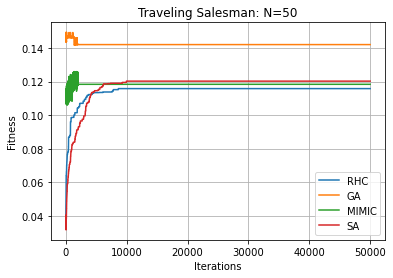

In [175]:
files = {
    "exp06-RHC-0"      : "RHC",
    "exp06-GA-0"       : "GA",
    "exp06-MIMIC-0"    : "MIMIC",
    "exp06-SA-0"       : "SA",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
# plot_fitness(ft_df[:2000], files, title="Traveling Salesman: N=50", save_as="tsm/11")
plot_fitness(ft_df[:50000], files, title="Traveling Salesman: N=50")

In [178]:
plot_max_fitness_bar(df_test[:50000], files, title="", plot=False)

RHC max_fitness= 0.11580460117872005 iterations= 8618 fevals= 8883.0
GA max_fitness= 0.14939153654024148 iterations= 125 fevals= 33914.0
MIMIC max_fitness= 0.1259584139652981 iterations= 1361 fevals= -1361.0
SA max_fitness= 0.12025463978954085 iterations= 9941 fevals= 10430.0


In [179]:
plot_max_time_bar(df_test[:50000], files, title="", plot=False)

RHC 0.4729998111724854
GA 0.617999792098999
MIMIC 60.401999950408936
SA 0.2809998989105225


# N=150

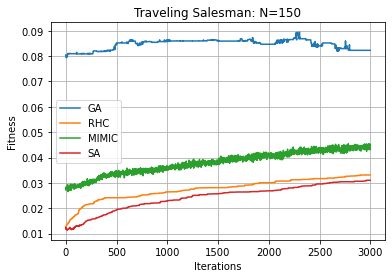

In [170]:
files = {
    "exp07-GA-0"       : "GA",
    "exp07-RHC-0"      : "RHC",
    "exp07-MIMIC-0"    : "MIMIC",
    "exp07-SA-0"       : "SA",
}

df_test = combine_csv("tsp", files)

ft_df = get_fitness_df(df_test)

fe_df = get_fevals_df(df_test)
t_df = get_time_df(df_test)

# ft_df
plot_fitness(ft_df[:3000], files, title="Traveling Salesman: N=150", save_as="tsm/12")

In [171]:
plot_max_fitness_bar(df_test[:3000], files, title="", plot=False)

GA max_fitness= 0.08941471350926307 iterations= 2277 fevals= 150650.0
RHC max_fitness= 0.03312121070200191 iterations= 2988 fevals= 3270.0
MIMIC max_fitness= 0.04546330582030928 iterations= 2784 fevals= -2784.0
SA max_fitness= 0.031030309735859463 iterations= 2970 fevals= 3467.0


In [172]:
plot_max_time_bar(df_test[:3000], files, title="", plot=False)

GA 4.809999942779541
RHC 0.3220000267028809
MIMIC 3384.0039999485016
SA 0.1360001564025879
